In [4]:
import sys, os
import json
import pandas as pd
import numpy as np
import time, math
from operator import sub
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.transforms as transforms
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({
    'font.family': 'serif',
    "font.serif": 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.latex.preamble': r'\usepackage{amsmath}'
})

v = 43


In [5]:
def add_inset(ax, rect, *args, **kwargs):
    box = ax.get_position()
    inax_position = ax.transAxes.transform(rect[0:2])
    infig_position = ax.figure.transFigure.inverted().transform(inax_position)
    new_rect = list(infig_position) + [box.width * rect[2], box.height * rect[3]]
    return fig.add_axes(new_rect, *args, **kwargs)

/tmp/ipykernel_773508/2012244240.py:136: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


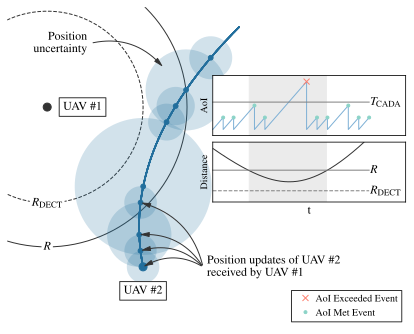

In [6]:
t = np.array([1, 2, 2, 3, 3, 5, 5, 6, 6, 10, 10, 11, 11, 12, 12, 14, 14, 15, 15, 16]) -1
aoi = np.array([0, 1, 0, 1, 0, 2, 0, 1 , 0, 4, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1])
uav_width = 20
t_max = 15

R = 350
R_DECT = 240

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_ylim([-550, 250])
ax.set_xlim([-100, 900])

width = 1000
height = 800

center = (0,0)
uav_1 = matplotlib.patches.Ellipse(center, width=uav_width, height=uav_width, fill=True, lw=1, ec='#333', fc='#333', clip_on=True)
ax.add_patch(uav_1)
ax.text(40, 0, 'UAV \#1', va='center', ha='left', bbox=dict(pad=4, lw=1, fc='#fff', color='#333'))

c1 = matplotlib.patches.Ellipse(center, width=2*R, height=2*R, fill=False, lw=1, ec='#333',)
ax.add_patch(c1)
ax.text(0, -R, '$R$', ha='center', va='center', bbox=dict(pad=2, lw=0, fc='#fff', color='#fff'))
ax.text(0, -R_DECT, '$R_\mathrm{DECT}$', ha='center', va='center', bbox=dict(pad=2, lw=0, fc='#fff', color='#fff'))
c1 = matplotlib.patches.Ellipse(center, width=2*R_DECT, height=2*R_DECT, ls="--", fill=False, lw=1, ec='#333',)
ax.add_patch(c1)

y = np.linspace(-400, 200, 10 * t_max)
x = 0.001 * y**2 + 0.6*y + 320

blue = "#226E9C"
color = '#7eb0d5'
rcvd_color = '#8bd3c7'
aoi_exceeded_color = '#fd7f6f'
v_max = 35

ax.plot(x,y, color=blue)
uav_1 = matplotlib.patches.Ellipse((x[0], y[0]), width=uav_width, height=uav_width, fill=True, lw=1, ec=blue, fc=blue, clip_on=True)
ax.add_patch(uav_1)
ax.text(x[0], y[0] -60, 'UAV \#2', va='center', ha='center', bbox=dict(pad=4, lw=1, fc='#fff', color='#333'))

for i in range(1, len(t)-1, 2):
    ti = t[i-1]
    tii = t[i]
    xi = x[ti * 10]
    yi = y[ti * 10]
    xii = x[tii * 10]
    yii = y[tii * 10]
    a = aoi[i]
    r = math.sqrt((xi -xii)**2 + (yi -yii)**2)
    ax.plot(x,y, color=blue)
    c1 = matplotlib.patches.Ellipse((xi, yi), width=2*r, height=2*r, lw=1, fc=blue, alpha = 0.2)
    ax.add_patch(c1)

    uav_1 = matplotlib.patches.Ellipse((xi, yi), width=12, height=12, fill=True, lw=1, ec=blue, fc=blue, clip_on=True)
    ax.add_patch(uav_1)

# xi = x[(len(t)-4)* 10]
# yi = y[(len(t)-4)* 10]
# uav_1 = matplotlib.patches.Ellipse((xi, yi), width=12, height=12, fill=True, lw=1, ec=blue, fc=blue, clip_on=True)
# ax.add_patch(uav_1)

## INSETS#
ts = np.array(range(len(x))) / len(x) * t_max
dist = np.sqrt(x**2+ y**2)
t_r_min = np.min(ts[dist < R])
t_r_max = np.max(ts[dist < R])
#a = matplotlib.patches.Rectangle((400, -50), width=580, height=180, lw=0, fc='#fff', zorder=2)
#ax.add_patch(a)
ax2 = add_inset(ax, [500/width, 500/height, 580/width, 180/height])

ax2.plot(t, aoi, lw=1, color=color)
ax2.text(t_max + 0.1, 80/v_max, '$T_\mathrm{CADA}$', ha='left', va='center')
ax2.plot([0, t_max],[80/v_max, 80/v_max], '-', color='#808080', lw=1)
ax2.fill_between([t_r_min, t_r_max],[-0.5,-0.5],[4.5,4.5], color='#ebebeb')
ax2.set_ylim([-0.5, 4.5])
ax2.set_xlim([0, t_max + 3.5])

for t_i, aoi_i in zip(t, aoi):
    if aoi_i > 0:
        c_i = aoi_exceeded_color if aoi_i > 80/v_max else rcvd_color
        icon_i = 'x' if aoi_i > 80/v_max else '.'
        ax2.plot(t_i, aoi_i, icon_i, color=c_i, lw=1)

ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylabel(r'$\mathrm{AoI}$', labelpad=0, fontsize=10)

#a = matplotlib.patches.Rectangle((400, -150), width=580, height=180, lw=0, fc='#fff', zorder=2)
#ax.add_patch(a)

ax3 = add_inset(ax, [500/width, 300/height, 580/width, 180/height])
ax3.plot(ts, dist, lw=1, color='#333')

ax3.fill_between([t_r_min, t_r_max],[180,180],[500,500], color='#ebebeb')

ax3.text(t_max + 0.1, R_DECT, '$R_\mathrm{DECT}$', ha='left', va='center')
ax3.plot([0, t_max],[R_DECT, R_DECT], '--', color='#808080', lw=1)
ax3.text(t_max + 0.1, R, '$R$', ha='left', va='center')
ax3.plot([0, t_max],[R, R], '-', color='#808080', lw=1)
ax3.set_ylim([180, 500])
ax3.set_xlim([0, t_max + 3.5])
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_ylabel(r'Distance', labelpad=0, fontsize=10)
ax3.set_xlabel('t', labelpad=0)

## Arrows
ax.text(100, 160, 'Position \nUncertainty', ha='right', va='center', bbox=dict(pad=2, lw=1, fc='#fff', color='#fff', alpha=0.6))
arrow = patches.FancyArrowPatch((110, 160), (290, 100), connectionstyle=f"arc3,rad=-0.3", arrowstyle="Simple, tail_width=0, head_width=4, head_length=8", color='#333')
ax.add_patch(arrow)

ax.text(400, -400, 'Position Updates of UAV \#2\n received by UAV \#1', ha='left', va='center', bbox=dict(pad=2, lw=1, fc='#fff', color='#fff', alpha=0.6))
for i in range(1, 8, 2):
    ti = t[i-1]
    tii = t[i]
    xi = x[ti * 10]
    yi = y[ti * 10]
    arrow = patches.FancyArrowPatch((390, -400), (xi, yi), connectionstyle=f"arc3,rad=0.3", arrowstyle="Simple, tail_width=0, head_width=4, head_length=8", color='#333')
    ax.add_patch(arrow)

# Spines

ax.set_xticks([])
ax.set_yticks([])
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)

ax.plot(-1000, 0, 'x', color=aoi_exceeded_color, lw=1, label='AoI Exceeded Event')
ax.plot(-1000, 0, '.', color=rcvd_color, lw=1,  label='AoI Met Event')
leg = ax.legend(loc='lower right', prop={'size': 10}, fancybox=False, framealpha=1.0, handletextpad=0)
leg.get_frame().set_edgecolor('#333')
fig.tight_layout()

fig.savefig(f"../figures/advanced_aoi_schematic_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.1)
fig.savefig(f"../figures/advanced_aoi_schematic_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.1)


plt.show()